# Import and cleaning

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.DataFrame(pd.read_csv('hour1.csv'))

In [5]:
df['dateday'] = pd.to_datetime(df['dateday'], format='%m/%d/%Y')
day = df.insert(loc=5, column='day', value=df['dateday'].dt.day)

In [6]:
df['count'].count()

17379

In [7]:
df1 = df.copy()  # make a copy of the original dataframe

df1.loc[df1['holiday'] == 0, 'holiday'] = 'No'
df1.loc[df1['holiday'] == 1, 'holiday'] = 'Yes'

df1.loc[df1['workingday'] == 0, 'workingday'] = 'No'
df1.loc[df1['workingday'] == 1, 'workingday'] = 'Yes'

df1.loc[df1['season'] == 1, 'season'] = 'Winter'
df1.loc[df1['season'] == 2, 'season'] = 'Spring'
df1.loc[df1['season'] == 3, 'season'] = 'Summer'
df1.loc[df1['season'] == 4, 'season'] = 'Fall'

df1.loc[df1['weather'] == 1, 'weather'] = 'Clear'
df1.loc[df1['weather'] == 2, 'weather'] = 'Cloud'
df1.loc[df1['weather'] == 3, 'weather'] = 'Light'
df1.loc[df1['weather'] == 4, 'weather'] = 'Heavy'

In [9]:
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

# EDA

<AxesSubplot:xlabel='temp', ylabel='count'>

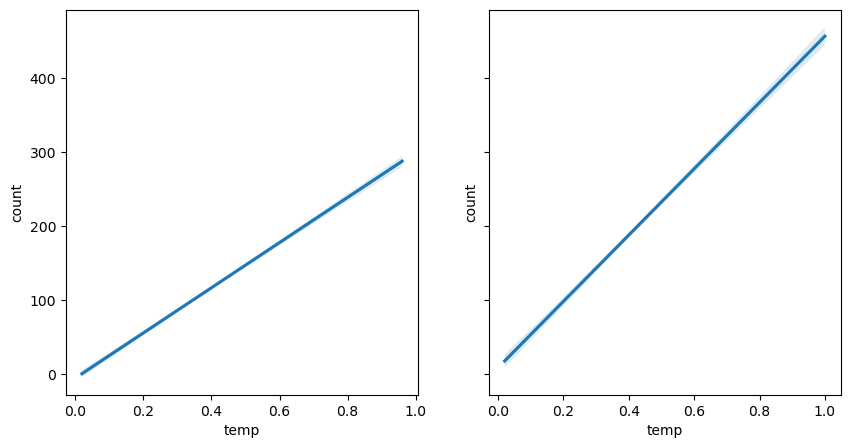

In [10]:
fig, axes = plt.subplots(ncols=2, sharey= True, figsize=(10, 5))

sns.regplot(data=df_year0, x='temp', y='count', scatter= False,  ax=axes[0])
sns.regplot(data=df_year1, x='temp', y='count', scatter= False,  ax=axes[1])


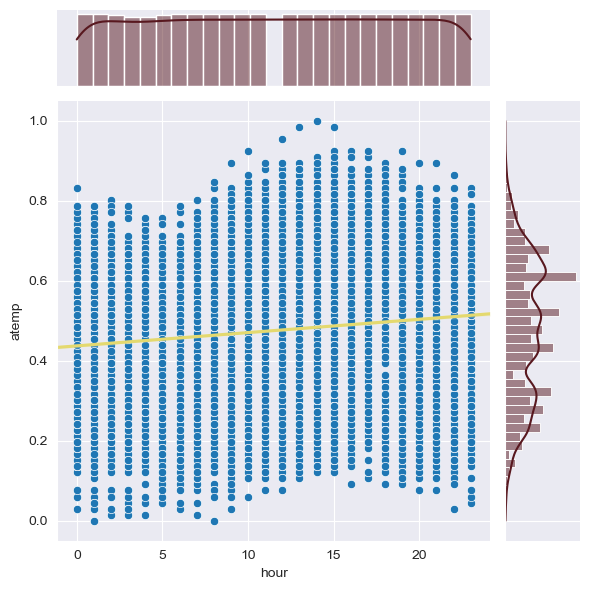

In [11]:
sns.set_style('darkgrid')

g = sns.JointGrid(data=df, x='hour', y='atemp')
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot, scatter=False, truncate=False, color= '#E4d96f')
g.plot_marginals(sns.histplot, kde=True, color= '#58181F')

plt.show()

In [12]:
# showing each step to find the average count

search_data = df[(df['season'] == 3) & (df['holiday'] == 0) & (df['workingday'] == 1)]

find_average = search_data.loc[0:,'count']

average = int(np.average(find_average))

print(f'Average count: {average}')

Average count: 238


In [13]:
# all this can 
df[(df['season'] == 3) & # summer
    (df['holiday'] == 0) & # Not holiday
    (df['hour'] >= 7) &  # Starting from
    (df['hour'] <= 19) & # Ending at
    (df['workingday'] == 1)]['count'].max() # Only working days


977

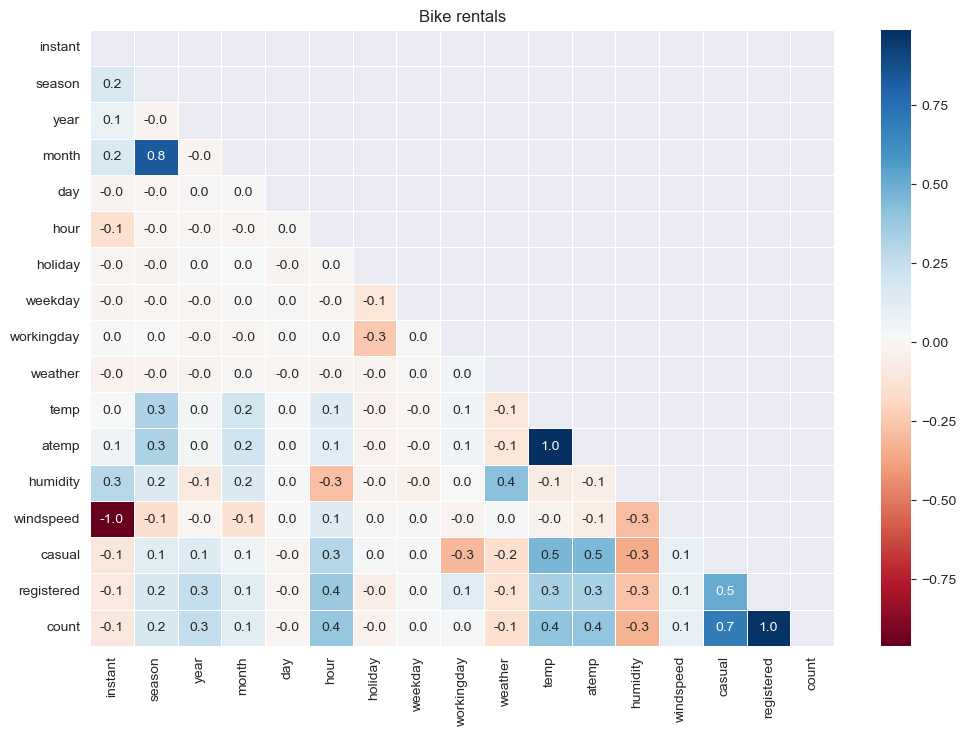

In [14]:
plt.figure(figsize=(12,8))


#giving the data 
corr = df.corr()


#giving new list 
x = df.columns.drop(['instant', 'count'])
y = df.columns.drop(['instant', 'count'])

#creating the mask to remove the top triangle
mask = np.triu(corr)

#creating the chart
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu", 
            fmt= '.1f',
            #xticklabels= x, yticklabels= y,
            mask=mask,
            linewidths= 0.5,
            #linecolor= 'black'
            )
plt.title('Bike rentals')

plt.show()

<AxesSubplot:xlabel='atemp', ylabel='registered'>

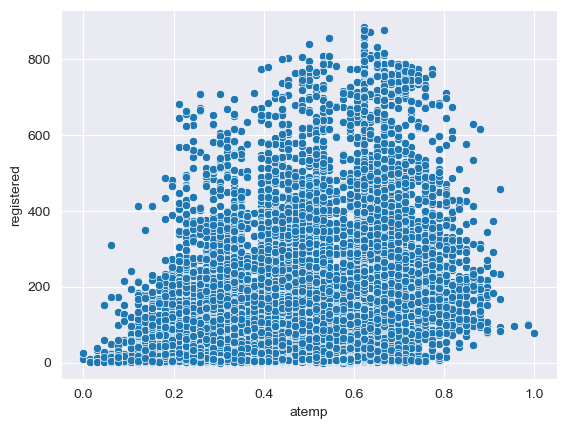

In [15]:
sns.scatterplot(data=df, x= 'atemp', y= 'registered')

<AxesSubplot:xlabel='atemp', ylabel='registered'>

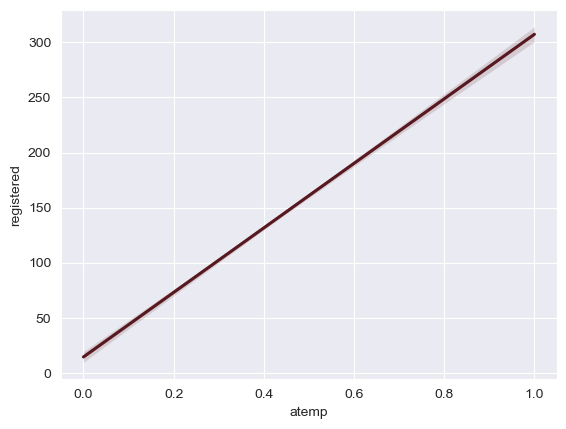

In [16]:
sns.regplot(data=df, x= 'atemp', y= 'registered', color= '#58181F', scatter= False)

# Building ML models

In [124]:
df.head(2)

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-07-03,3,0,7,3,17,0,0,0,3,0.8,0.7424,0.49,0.8507,181,177,358
1,2,2011-07-03,3,0,7,3,18,0,0,0,3,0.8,0.7424,0.49,0.8507,74,107,181


## ML Casual

In [303]:
X = df[['temp', 'hour', 'season', 'workingday', 'humidity', 'windspeed']]
y = df['casual']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

In [304]:
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [305]:
# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 2.44565859e-11  1.07320355e+02 -1.93068076e+00  6.66594906e+01
  1.11671618e+01  6.88398849e+01 -1.30649777e+02  7.42966387e+02
  1.77843190e+01 -7.59219423e+00 -1.57991777e+02 -6.12938292e+02
 -1.75612645e+02  6.81922335e-01  1.14884405e+00 -3.29746421e+00
 -4.50882136e+00  5.12908308e-01 -2.35718577e+01  4.94866349e+00
 -6.48421696e+01  7.79500853e+01  1.11671618e+01  3.36103651e+01
  5.20284849e+00  1.32916084e+02  2.63009798e+02  8.79652273e+01
 -9.77148222e+02  1.07092094e+01 -1.40564627e+01  1.75130717e+02
  6.99265551e+02  1.52771132e+02 -7.71817030e-01 -4.99391189e-01
 -2.63843206e+00 -5.93389878e+00  5.42296247e+00  1.59102926e+01
  9.66855271e-01 -1.08188318e+02  3.55635859e+01 -1.57991777e+02
  1.55811128e+02 -1.72239512e+02  3.54910646e+01 -4.45886240e+01
 -1.12766516e+02 -3.53785499e-02 -5.19841119e-03  3.64520451e-01
  5.44887224e-01  5.93714494e-02 -2.46772853e-01  1.90019863e-02
  6.66611167e-01 -1.44600072e-01 -3.29746421e+00 -1.58121944e+00
 -1.0138766

In [306]:
X_addC = sm.add_constant(X_train)
result = sm.OLS(y_train, X_addC).fit()
print(f'{int((result.rsquared)*100)}%, {int((result.rsquared_adj)*100)}%')

72%, 72%


In [307]:
r2_score = model.score(X_test, y_test)

print('R2 score:', r2_score)

R2 score: 0.7203870188669969


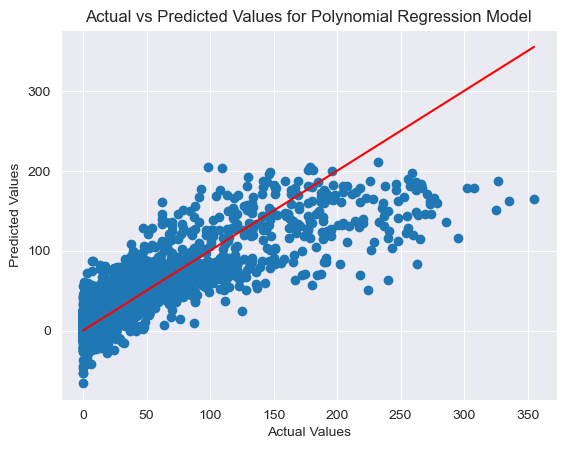

In [308]:
# predict on the test set
y_pred = model.predict(X_test)

# create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression Model')
# create an array of x-values
x = np.linspace(start=y_test.min(), stop=y_test.max())

# plot the line
plt.plot(x, x, color='red')

plt.show()

In [309]:
# defining the variables
x = df[['temp', 'hour', 'season', 'workingday', 'humidity', 'windspeed']]
y = df['casual'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2281.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:43:02   Log-Likelihood:                -87354.
No. Observations:               17379   AIC:                         1.747e+05
Df Residuals:                   17372   BIC:                         1.748e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6173      1.649     18.563      0.0

In [30]:
df[['casual']].shape
df[['temp', 'hour', 'season', 'workingday', 'humidity', 'windspeed']].shape


(17379, 6)

## ML Registarted
### Rush hours

In [282]:
df_rush = df[df['hour'].isin([8, 17, 18])]

In [283]:
df_rush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed', 'registered']].head(1)

,temp,hour,season,workingday,weather,windspeed,registered
0,0.8,17,3,0,3,0.8507,177


In [287]:
X = df_rush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df_rush['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

# poly = PolynomialFeatures(degree=1)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)

# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [331.70544291   0.8368885   36.55380069 285.5713826  -58.45330888
  -8.20367582]
Intercept: -22.92833964734166


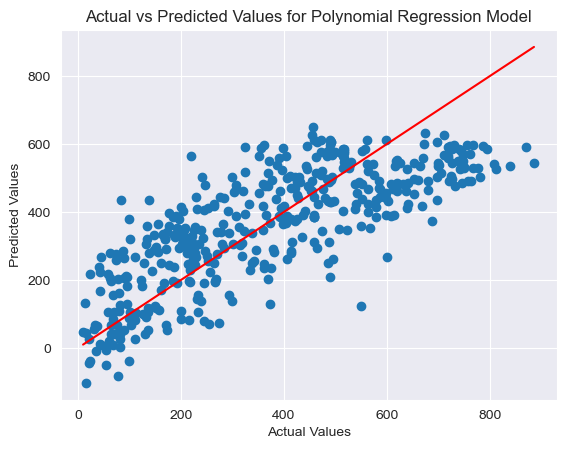

In [288]:
# predict on the test set
y_pred = model.predict(X_test)

# create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression Model')
# create an array of x-values
x = np.linspace(start=y_test.min(), stop=y_test.max())

# plot the line
plt.plot(x, x, color='red')

plt.show()

In [289]:
# calculate R2 score
r2_score = model.score(X_test, y_test)
print(f'R2 score: {int((r2_score)*100)}%')

# Example on R_Square and Adjusted R Square
X_addC = sm.add_constant(X_train)
result = sm.OLS(y_train, X_addC).fit()
print(f'R2: {int((result.rsquared)*100)}%, {int((result.rsquared_adj)*100)}%')

R2 score: 60%
R2: 59%, 59%


### Not Rush

In [310]:
df_notrush = df[~((df['hour'] == 8) | (df['hour'] == 17) | (df['hour'] == 18))]

In [313]:
X = df_notrush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df_notrush['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

# adding the curve
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 7.36702895e-10  8.47082216e+01 -8.85860719e+00 -4.43673567e+01
 -1.93001710e+01  1.46548464e+02  1.20401593e+02  8.38834405e+02
  5.56539641e+00  1.02592751e+01 -3.76765798e+01 -2.75214857e+02
 -2.34306256e+02  2.45803686e+00  4.18341583e+00 -4.79697286e-02
 -1.45395723e+00 -1.30254503e+01 -9.96365609e+00  5.17731922e+01
  8.56940652e+00  3.38902999e+01 -1.93001710e+01  8.18690177e-01
  2.30328324e+01 -4.17392449e+01 -9.85219914e+01 -3.00800454e+01
 -1.12271407e+03  1.13848803e+01  9.42022448e+01 -1.92940350e+02
  2.52256835e+02  8.08096788e+01 -7.75253256e-02 -2.54686064e+00
  6.46609201e+00 -3.83357172e+00  1.75293860e+01 -1.68558929e+01
  2.01187808e+00 -1.01569983e+01  8.50427475e+01 -3.76765798e+01
  5.77127986e+01 -1.66549833e+02  2.42774401e+01 -4.97916159e+01
 -1.17858249e+02 -9.93999185e-02 -1.25182595e-01  1.96376025e-02
  1.76699932e-01  5.55275689e-01  3.60074513e-02  2.40569745e-01
  1.02635532e-01 -1.58207040e+00 -4.79697288e-02 -1.45254954e+00
  1.2645613

In [314]:
# calculate R2 score
r2_score = model.score(X_test, y_test)
print('R2 score:', r2_score)

#Example on R_Square and Adjusted R Square
X_addC = sm.add_constant(X_train)
result = sm.OLS(y_train, X_addC).fit()
print(f'R2: {result.rsquared, result.rsquared_adj}')

R2 score: 0.5445425546354776
R2: (0.5429287392307913, 0.5400526491646827)


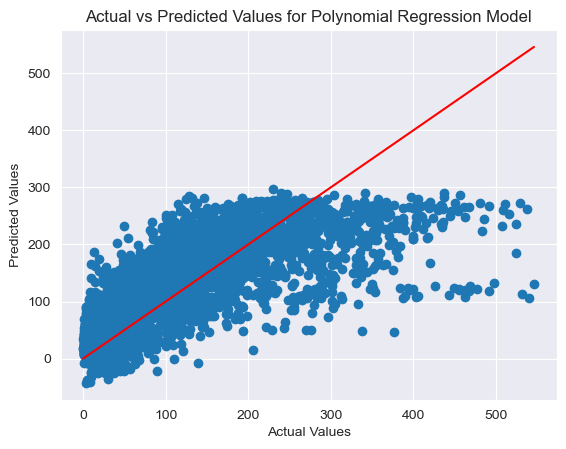

In [315]:
# predict on the test set
y_pred = model.predict(X_test)

# create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression Model')
# create an array of x-values
x = np.linspace(start=y_test.min(), stop=y_test.max())

# plot the line
plt.plot(x, x, color='red')

plt.show()

# Combining ML's

In [294]:
new_day = [0.92, 16, 2, 1, 1, 0.1642] 
#values = 64,317,381

In [302]:
#new_day = [0.74, 18, 3, 1, 1, 0.2239]
df.iloc[10000
        ]

instant                     10001
dateday       2012-07-17 00:00:00
season                          3
year                            1
month                           7
day                            17
hour                           16
holiday                         0
weekday                         2
workingday                      1
weather                         1
temp                         0.92
atemp                      0.8182
humidity                     0.29
windspeed                  0.1642
casual                         64
registered                    317
count                         381
Name: 10000, dtype: object

In [296]:
X = df[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df['casual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

model = LinearRegression()
model.fit(X_train, y_train)
casual_type = int(model.predict([new_day]))

print(f"Predicted Casual users: {casual_type}")

Predicted Casual users: 81


c:\Users\renev\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [297]:
X = df_notrush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df_notrush['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

model = LinearRegression()
model.fit(X_train, y_train)
notrush_type = int(model.predict([new_day]))

print(f"Predicted not rush hour Registered users: {notrush_type}")

Predicted not rush hour Registered users: 225


c:\Users\renev\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [298]:
X = df_rush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df_rush['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

model = LinearRegression()
model.fit(X_train, y_train)
rush_type = int(model.predict([new_day]))

print(f"Predicted Rush hour Registered users: {rush_type}")

Predicted Rush hour Registered users: 594


c:\Users\renev\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [299]:
print(f'Number of registered users for the given hour is: {rush_type}')
print(f'Number of casaul users for the given hour is: {casual_type}', '\n')
print(f'Combined count for the given hour is: {rush_type + casual_type}')

Number of registered users for the given hour is: 594
Number of casaul users for the given hour is: 81 

Combined count for the given hour is: 675


In [300]:
print(f'Number of registered users for the given hour is: {notrush_type}')
print(f'Number of casaul users for the given hour is: {casual_type}', '\n')
print(f'Combined count for the given hour is: {notrush_type + casual_type}')

Number of registered users for the given hour is: 225
Number of casaul users for the given hour is: 81 

Combined count for the given hour is: 306


The Splitter you selected: year
The Column you selected: hour


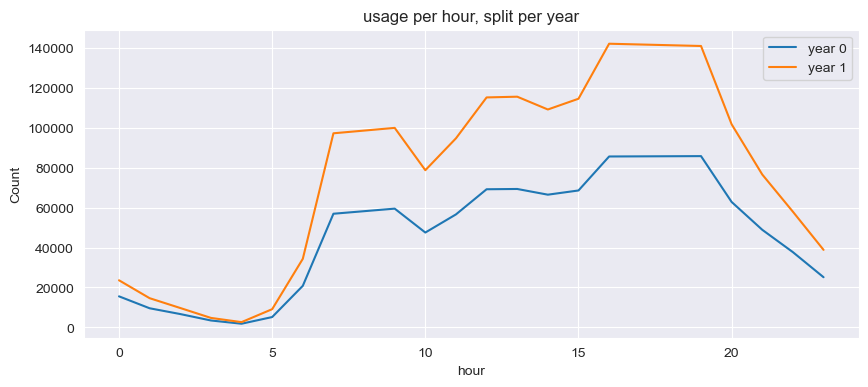

In [316]:
def paint(splitter, catagory, combine=True):
    fig, axs = plt.subplots(1, sharey=True, figsize=(10, 4))

    #this converts all words in a column into a number
    cat= df_notrush[splitter].unique()

    for idx, c in enumerate(cat):
        x = []
        y = []
        c = []
        r = []
        for h in df_notrush[df_notrush[splitter] == cat[idx]].groupby(catagory):
            x.append(h[0])
            y.append(h[1]['count'].sum())
            c.append(h[1]['casual'].sum())
            r.append(h[1]['registered'].sum())
        if combine == True:
            axs.plot(x, y, label = f'{splitter} {idx}')
            axs.set_title(f'usage per {catagory}, split per {splitter}' )
            axs.set_xlabel(catagory)
            axs.set_ylabel('Count')
        else:
            axs.plot(x, c, label = f'{splitter} {idx} casual')
            axs2 = axs.twinx()
            axs.plot(x, r, label = f'{splitter} {idx} registered')
            axs.set_title(f'usage per {catagory}, split per {splitter}' )
            axs.set_xlabel(catagory)
            axs.set_ylabel('Count')           
        if len(cat) < 13:
            axs.legend()
    plt.show()

valid_inputs = df_notrush.columns
splitter_input = input(f"Select a Splitter from the following: {', '.join(valid_inputs)}\n")
column_input = input(f"Select a Catagory from the following: {', '.join(valid_inputs)}\n")

if splitter_input not in valid_inputs:
    print("Invalid input. Please try again.")
elif column_input not in valid_inputs:
    print("Invalid second input. Please try again.")
else:
    print(f"The Splitter you selected: {splitter_input}")
    print(f"The Column you selected: {column_input}")
    paint(splitter_input, column_input, True)